In [ ]:
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd
from matplotlib import pyplot as plt
import pickle
import ROOT
import scipy.signal
import scipy.interpolate
from scipy.interpolate import make_interp_spline, BSpline
import csv
from utilities import * # My functions: pair_dat_err, uncertainties_to_root_graph_errors
from uncertainties import umath
DATADIR = "../data"
OUTPUTDIR = "../output"

In [10]:
def cellFromCSV(path, row_index, col_index):
  with open(path, 'r') as f:
    mycsv = csv.reader(f)
    column = []
    for row in mycsv:
        column.append(row[col_index])

  return column[row_index]


def openDat(path):
  a = pd.read_table(path, header=18, sep="\t", usecols=[0,1])
  #a = a.transpose()
  a = a.rename(index={0: 'Frequency', 1: 'Count'})
  #a = a.transpose()

  data = {'Data' : a
  }
  return data

In [11]:
f_ODMR = openDat(f'{DATADIR}/ODMR/20220623-1843-21_ODMR_data_ch0_range0.dat')
#f_ODMR_err = 0.1/100.*f_ODMR 
f_ODMR = openDat(f'{DATADIR}/ODMR/20220623-1843-21_ODMR_data_ch0_range0.dat')
freq = f_ODMR['Data'].to_numpy().transpose()[0]   
count = f_ODMR['Data'].to_numpy().transpose()[1]  
#freq_err = f_ODMR_err['Data'].to_numpy().transpose()[0]   
#count_err = f_ODMR_err['Data'].to_numpy().transpose()[1]

#freq_arr = pair_dat_err(f_ODMR['Frequency'], f_ODMR_err['Frequency'])

In [12]:
#df_data = pd.read_csv(f'{DATADIR}/ODMR/20220623-1843-21_ODMR_data_ch0_range0.dat', header=18, sep='\t', usecols=[0,1])
df_data = pd.read_csv(f'{DATADIR}/ODMR/20220623-1843-21_ODMR_data_ch0_range0.dat', header=18, sep='\t', usecols=[0,1])
df_data_err = 0.1/100. * df_data
df_data.head()
freq_arr = pair_dat_err(df_data['#frequency (Hz)'], df_data_err['#frequency (Hz)'])
count_arr = pair_dat_err(df_data['count data (counts/s)'], df_data_err['count data (counts/s)'])

[Text(0, 0.5, 'Count/sec (#/s)')]

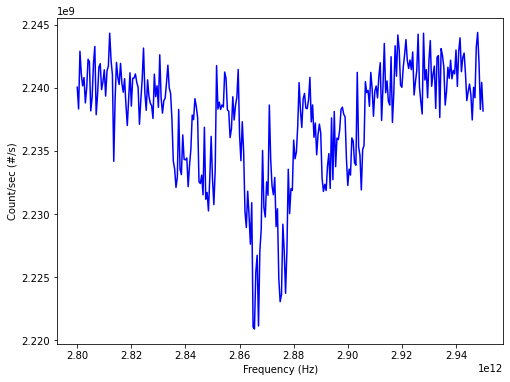

In [13]:
fig, ax  = plt.subplots(figsize=(8,6))
ax.plot(freq, count, color="blue")
ax.set(xlabel = "Frequency (Hz)")
ax.set(ylabel = "Count/sec (#/s)")

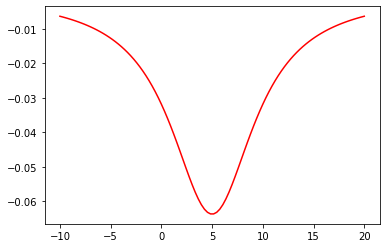

In [14]:

def inv_lorentz(x,a):
   return -1/np.pi*a/(a*a+(x-5)*(x-5))

x = np.linspace(-10, 20, 100)

plt.plot(x, inv_lorentz(x,5), color='red')

plt.show()

In [15]:
def lorentzian(cen,amp,wid):
    return (amp*wid**2/((x-cen)**2+wid**2))

In [8]:
popt_3lor, pcov_3lor = scipy.optimize.curve_fit(lorentzian(), x_array, y_array_2gauss, p0=[amp1, cen1, sigma1, amp2, cen2, sigma2])
perr_3lor = np.sqrt(np.diag(pcov_3lor))
pars_1 = popt_3lor[0:3]
pars_2 = popt_3lor[3:6]
gauss_peak_1 = lorentzian(x_array, *pars_1)
gauss_peak_2 = lorentzian(x_array, *pars_2)

TypeError: lorentzian() missing 3 required positional arguments: 'cen', 'amp', and 'wid'

In [9]:
#canvas = ROOT.TCanvas("c1", "lorentz fit 1", 1000, 500)
#lorentz_gerr = uncertainties_to_root_graph_errors(freq_arr, count_arr)
#function_formula = "lorentzian([0],[1],[2])"
#function_formula = "-1/pi*[1]/([1]*[1]+(x-[0])*(x-[0]))-1/pi*[3]/([3]*[3]+(x-[2])*(x-[2]))"
#fit_f = ROOT.TF1("fit1", function_formula)

#fit_f.SetLineColor(4)
#fit_f.SetParName(0, "$\mu$")
#fit_f.SetParName(1, "$\lambda$")
#fit_f.SetParLimits(0,2850e+9,2890e+9)
#ROOT.gStyle.SetOptFit(True)
#canvas.Draw()
#lorentz_gerr.Draw()
#lorentz_gerr.Fit(fit_f, "MSE")

In [10]:
p = list(scipy.signal.find_peaks(count * -1., distance=40))[0]
#Other useful parameters:
#prominence
#threshold
#please see https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html
# ^^^ Fare fine tuning di questi parametri finché non va

# SPLINE
xint = np.linspace(freq.min(), freq.max(), 500) 
spl = make_interp_spline(freq[p], count[p], k=2)  # type: BSpline
interp = spl(xint)

# E' anche interessante provare a cambiare il tipo di interpolazione, per esempio usare una sinc (sinx/x)

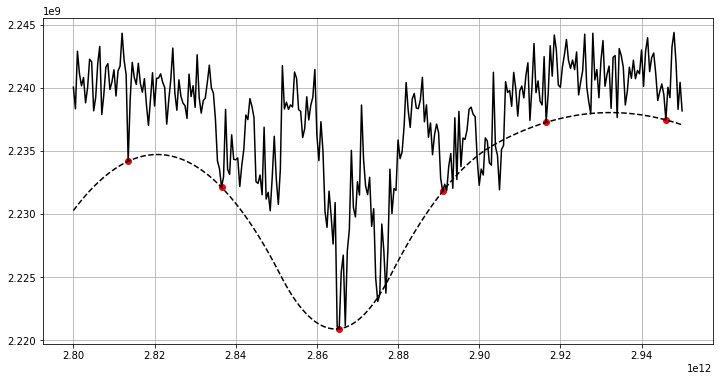

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
ax.grid()
ax.plot(freq, count, color='black')
ax.scatter(freq[p], count[p], color = "red")
ax.plot(xint, interp, color = "black", linestyle = "--")